# Text-guided image-to-image generation

The [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) lets you pass a text prompt and an initial image to condition the generation of new images.

Before you begin, make sure you have all the necessary libraries installed:

Download and preprocess an initial image so you can pass it to the pipeline:

In [26]:
from PIL import Image, ImageDraw, ImageFont

font_path = "content/DMSerifDisplay-Regular.ttf"

In [29]:
class Ad:
    def __init__(self, image):
        self.canvas = Image.new('RGB', (image.width + 200, image.height + 200), (255, 255, 255))
        self.draw = ImageDraw.Draw(self.canvas)

    def draw_canvas(self, color, frame_thickness=1, border_offset=20, border_thickness=5, corner_radius=40):
        # Define the positions for the rounded rectangle
        top_left = (frame_thickness + border_offset, frame_thickness)
        bottom_right = (self.canvas.width - frame_thickness - border_offset, frame_thickness + border_thickness)

        # Draw the top rounded border line
        self.draw.rounded_rectangle([top_left, bottom_right], fill=color, radius=corner_radius)

        # Adjust the bottom positions for the rounded rectangle
        top_left = (frame_thickness + border_offset, self.canvas.height - frame_thickness - border_thickness)
        bottom_right = (self.canvas.width - frame_thickness - border_offset, self.canvas.height - frame_thickness)

        # Draw the bottom rounded border line
        self.draw.rounded_rectangle([top_left, bottom_right], fill=color, radius=corner_radius)

        self.draw.rectangle([frame_thickness, frame_thickness, self.canvas.width - frame_thickness, self.canvas.height - frame_thickness], outline="#000000", width=frame_thickness*2)

        return self.draw
    
    def add_image(self, image, x, y):
        # Place the logo at the top
        canvas.paste(image, (x, y))

    def add_punchline(self, color, punchline_text, font_size=20):
        font_large = ImageFont.truetype(font_path, font_size)
        # # Get the punchline text size
        text_width, text_height = self.draw.textsize(punchline_text, font=font_large)
        # Draw the punchline
        self.draw.text(((self.canvas.width - text_width) / 2, self.canvas.height - text_height - 80), punchline_text, fill=color, font=font_large)
        return self.draw
    
    def add_button(self, font_size=15):
        font_small = ImageFont.truetype(font_path, font_size)
        return self.draw

In [31]:
# Load the provided images
generated_image = Image.open("photo1.png")
logo_image = Image.open("logo1.png")

# Parameters for the ad template
color = "#316346"
punchline_text = "Fırsatları Kacırmayın, Bugün Kesfedin!"
button_text = "Kesfet"

# # Place the logo at the top
# canvas.paste(logo_image, (int((canvas.width - logo_image.width) / 2), 10))

# # Place the generated image below the logo
# canvas.paste(generated_image, (80, logo_image.height + 20))

# # Get the button text size
# button_width, button_height = draw.textsize(button_text, font=font_small)
# button_x = (canvas.width - button_width) / 2
# button_y = canvas.height - button_height - 20


# # Define the rectangle's dimensions
# rectangle_padding = 10  # Inner padding between rectangle and text
# rectangle_width = button_width + 2 * rectangle_padding
# rectangle_height = button_height + 2 * rectangle_padding

# # Calculate the position to center the text within the rectangle
# text_x = button_x + rectangle_padding
# text_y = button_y + rectangle_padding

# # Draw the button
# draw.rounded_rectangle([button_x, button_y, button_x + button_width, button_y + button_height], fill=color, radius=0.5)
# draw.text((text_x, text_y), button_text, fill="white", font=font_small)

draw_canvas(generated_image, color)


C:\Users\user\AppData\Local\Temp\ipykernel_16112\279742118.py:22: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


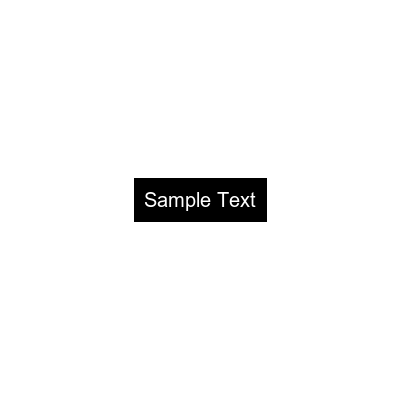

In [19]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank image with a white background
width, height = 400, 400
background_color = (255, 255, 255)
image = Image.new('RGB', (width, height), background_color)

# Create an ImageDraw object
draw = ImageDraw.Draw(image)

# Define the parameters
rectangle_color = (0, 0, 0)
text_color = (255, 255, 255)
text = "Sample Text"
font_path = "arial.ttf"  # Change to the path of your font file
font_size = 20

# Load the specified font
font = ImageFont.truetype(font_path, font_size)

# Calculate the size of the text
text_width, text_height = draw.textsize(text, font=font)

# Define the rectangle's dimensions
rectangle_padding = 10  # Inner padding between rectangle and text
rectangle_width = text_width + 2 * rectangle_padding
rectangle_height = text_height + 2 * rectangle_padding

# Calculate the position to center the rectangle in the image
x = (width - rectangle_width) / 2
y = (height - rectangle_height) / 2

# Draw the rectangle with the calculated position
draw.rectangle([x, y, x + rectangle_width, y + rectangle_height], fill=rectangle_color)

# Calculate the position to center the text within the rectangle
text_x = x + rectangle_padding
text_y = y + rectangle_padding

# Draw the text within the rectangle
draw.text((text_x, text_y), text, fill=text_color, font=font)

image


In [12]:
from PIL import Image, ImageDraw, ImageFont

import textwrap

astr = '''The rain in Spain falls mainly on the plains.'''

para = textwrap.wrap(astr, width=15)

MAX_W, MAX_H = 200, 200

im = Image.new('RGB', (MAX_W, MAX_H), (255, 255, 255))  # Updated background color
draw = ImageDraw.Draw(im)
font = ImageFont.truetype('content/DMSerifDisplay-Regular.ttf', 18)  # Updated font path to a local Arial font

current_h, pad = 50, 10

for line in para:
    w, h = draw.textbbox((0, 0), line, font=font)
    draw.text(((MAX_W - w) / 2, current_h), line, font=font)
    current_h += h + pad

im.show()


ValueError: too many values to unpack (expected 2)